In [1]:
#Importar Librerias
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar el dataset original, importante el dataset se encuentra en google drive
main_path="drive/MyDrive/Dataset_MP"
name= "flights.csv"
full_path=os.path.join(main_path,name)

In [3]:
df = pd.read_csv(full_path)

/tmp/ipython-input-3-3149154663.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(full_path)


In [4]:
df.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
#Valores Nulos Dataset flight
df.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,14721
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


Matriz de correlación entre variables numéricas:
                     YEAR     MONTH       DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
YEAR                  NaN       NaN       NaN          NaN            NaN   
MONTH                 NaN  1.000000  0.008874    -0.007847      -0.020746   
DAY                   NaN  0.008874  1.000000     0.001111       0.001855   
DAY_OF_WEEK           NaN -0.007847  0.001111     1.000000       0.014461   
FLIGHT_NUMBER         NaN -0.020746  0.001855     0.014461       1.000000   
SCHEDULED_DEPARTURE   NaN  0.000207 -0.001647     0.008007      -0.005485   
DEPARTURE_TIME        NaN -0.004085 -0.002644     0.005607      -0.001444   
DEPARTURE_DELAY       NaN -0.021994 -0.000176    -0.011510      -0.008665   
TAXI_OUT              NaN -0.013117 -0.002661    -0.020639       0.050369   
WHEELS_OFF            NaN -0.004946 -0.003318     0.004060       0.005289   
SCHEDULED_TIME        NaN  0.010784  0.003403     0.014954      -0.317394   
ELAPSED_TIME          NaN  

/tmp/ipython-input-7-2497153712.py:14: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


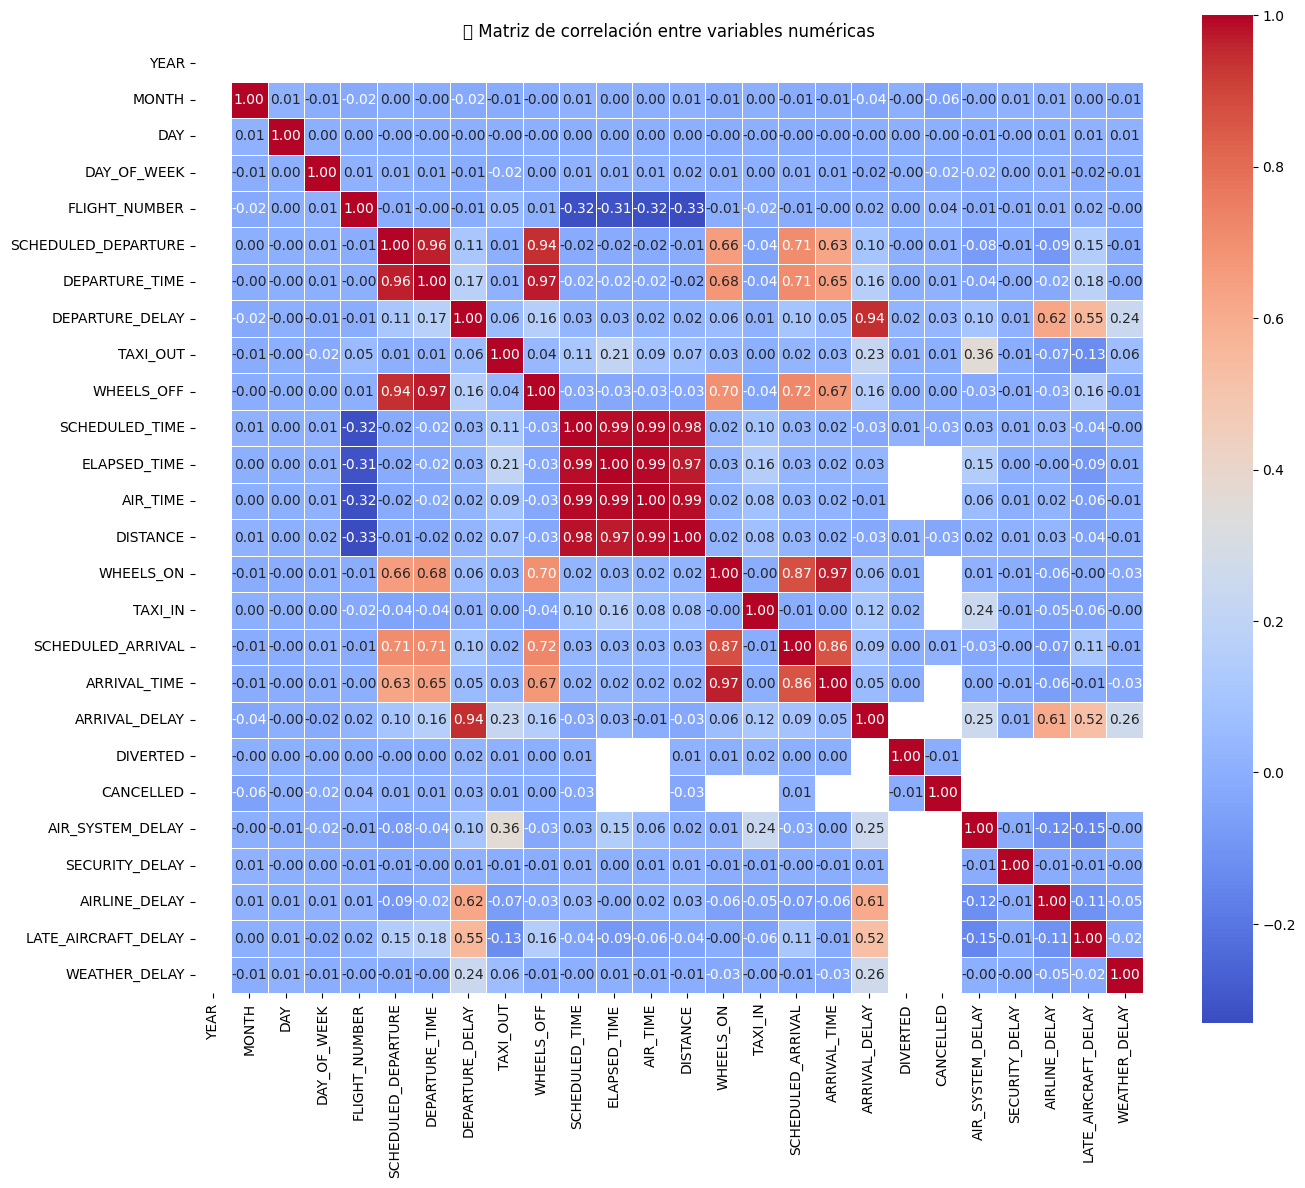

In [7]:
#Filtramos solo las columnas numéricas del dataframe
numeric_df = df.select_dtypes(include=['int64', 'float64'])

#Calculamos la matriz de correlación
corr_matrix = numeric_df.corr()

print("Matriz de correlación entre variables numéricas:")
print(corr_matrix)

#Matriz de correlación
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('🔗 Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

In [8]:
#Eliminamos vuelos cancelados y desviados
df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]

In [9]:
#Eliminamos columnas con mucha informacion nula o poco util
cols_to_drop = [
    'CANCELLED', 'DIVERTED', 'CANCELLATION_REASON',
    'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
    'WHEELS_OFF', 'WHEELS_ON', 'ARRIVAL_TIME',
    'TAXI_IN', 'ELAPSED_TIME', 'AIR_TIME',
    'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
    'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
    'TAIL_NUMBER', 'YEAR'
]

# Filtramos la lista para quedarnos solo con las que sí existen en el DataFrame actual
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Ahora eliminamos esas columnas sin error
df = df.drop(columns=cols_to_drop)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   SCHEDULED_TIME       float64
 9   DISTANCE             int64  
 10  SCHEDULED_ARRIVAL    int64  
 11  ARRIVAL_DELAY        float64
dtypes: float64(2), int64(7), object(3)
memory usage: 566.7+ MB


In [11]:
#Revisamos si quedan valores Nulos
df.isnull().sum()

,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0
SCHEDULED_TIME,0
DISTANCE,0


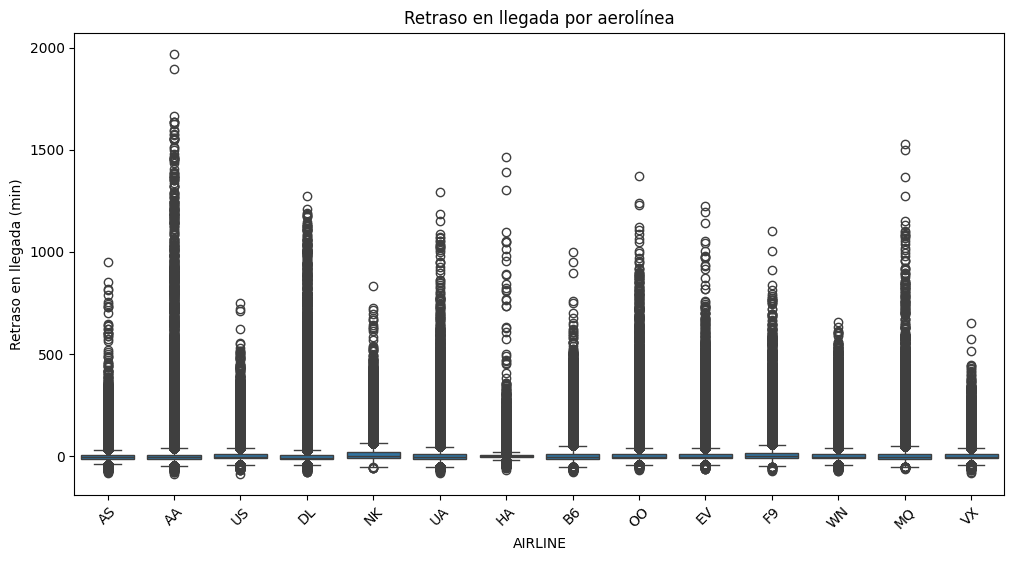

In [12]:
#Boxplot: arrival delay por aerolínea (antes de binarizar)
if 'ARRIVAL_DELAY' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='AIRLINE', y='ARRIVAL_DELAY', data=df)
    plt.title('Retraso en llegada por aerolínea')
    plt.xticks(rotation=45)
    plt.ylabel('Retraso en llegada (min)')
    plt.show()

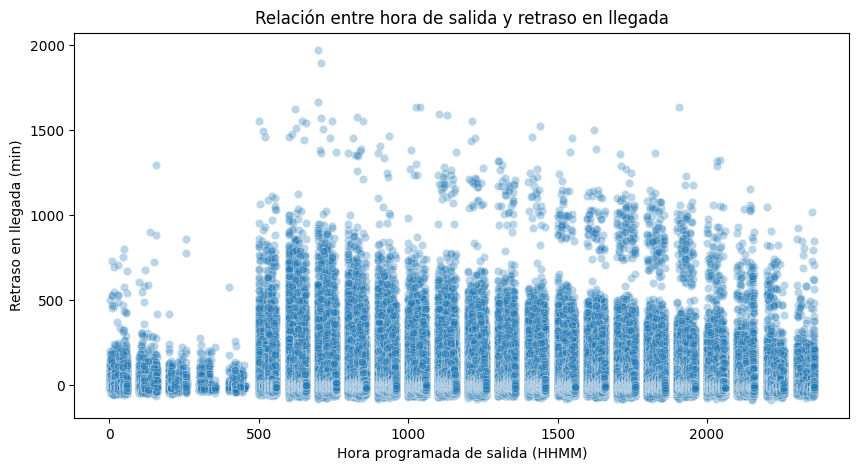

In [13]:
#Gráfico de dispersión: hora programada de salida vs retraso en llegada
if 'ARRIVAL_DELAY' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='SCHEDULED_DEPARTURE', y='ARRIVAL_DELAY', data=df, alpha=0.3)
    plt.title('Relación entre hora de salida y retraso en llegada')
    plt.xlabel('Hora programada de salida (HHMM)')
    plt.ylabel('Retraso en llegada (min)')
    plt.show()

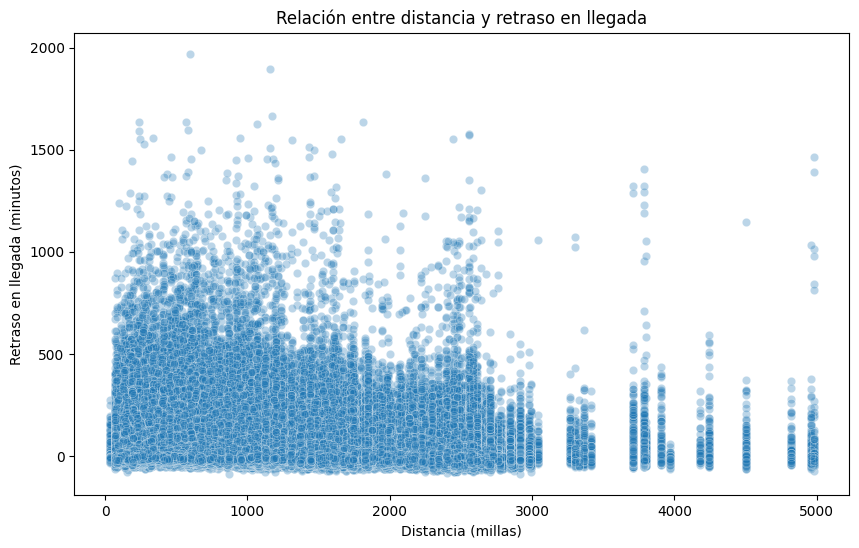

In [14]:
#Grafica Distancia vs retraso en llegada
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='DISTANCE', y='ARRIVAL_DELAY', alpha=0.3)
plt.title('Relación entre distancia y retraso en llegada')
plt.xlabel('Distancia (millas)')
plt.ylabel('Retraso en llegada (minutos)')
plt.show()

In [15]:
#Creacion de la Variable Target: Columna binaria: 1 si el vuelo se retrasó 15 min o mas
df['DELAYED'] = (df['ARRIVAL_DELAY'] >= 15).astype(int)

# Eliminamos ahora ARRIVAL_DELAY porque ya no se necesita
df_limpio = df.drop(columns=['ARRIVAL_DELAY'])
df_limpio.to_csv('df_limpio.csv', index=False)

In [16]:
df_limpio.head(20)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DELAYED
0,1,1,4,AS,98,ANC,SEA,5,205.0,1448,430,0
1,1,1,4,AA,2336,LAX,PBI,10,280.0,2330,750,0
2,1,1,4,US,840,SFO,CLT,20,286.0,2296,806,0
3,1,1,4,AA,258,LAX,MIA,20,285.0,2342,805,0
4,1,1,4,AS,135,SEA,ANC,25,235.0,1448,320,0
5,1,1,4,DL,806,SFO,MSP,25,217.0,1589,602,0
6,1,1,4,NK,612,LAS,MSP,25,181.0,1299,526,0
7,1,1,4,US,2013,LAX,CLT,30,273.0,2125,803,0
8,1,1,4,AA,1112,SFO,DFW,30,195.0,1464,545,0
9,1,1,4,DL,1173,LAS,ATL,30,221.0,1747,711,0


In [17]:
#ANALISIS EXPLORATORIO DE DATOS (EDA)
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
              MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5.714008e+06  5.714008e+06  5.714008e+06   5.714008e+06   
mean   6.547799e+00  1.570759e+01  3.932643e+00   2.164384e+03   
std    3.397421e+00  8.774394e+00  1.985967e+00   1.754706e+03   
min    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%    4.000000e+00  8.000000e+00  2.000000e+00   7.280000e+02   
50%    7.000000e+00  1.600000e+01  4.000000e+00   1.681000e+03   
75%    9.000000e+00  2.300000e+01  6.000000e+00   3.211000e+03   
max    1.200000e+01  3.100000e+01  7.000000e+00   9.320000e+03   

       SCHEDULED_DEPARTURE  SCHEDULED_TIME      DISTANCE  SCHEDULED_ARRIVAL  \
count         5.714008e+06    5.714008e+06  5.714008e+06       5.714008e+06   
mean          1.328907e+03    1.418940e+02  8.244569e+02       1.493187e+03   
std           4.835251e+02    7.531400e+01  6.086620e+02       5.069011e+02   
min           1.000000e+00    1.800000e+01  3.100000e+01     

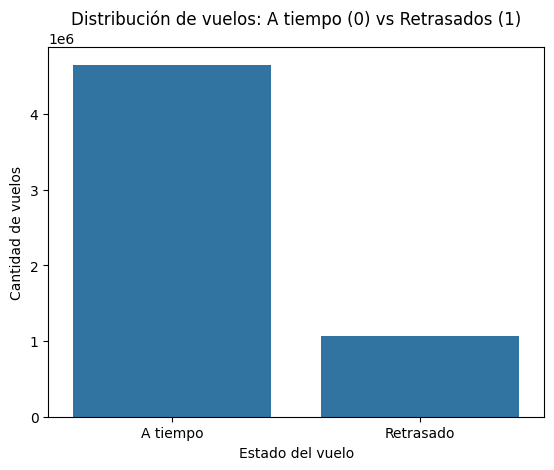

DELAYED
0    4650569
1    1063439
Name: count, dtype: int64

Porcentaje de vuelos retrasados:
DELAYED
0    81.388913
1    18.611087
Name: proportion, dtype: float64

Distribución de la variable objetivo:
DELAYED
0    0.813889
1    0.186111
Name: proportion, dtype: float64
La clase está desbalanceada. Esto puede afectar futuros modelos.


In [18]:
#Conteo de vuelos a tiempo vs retrasados
sns.countplot(x='DELAYED', data=df)
plt.title('Distribución de vuelos: A tiempo (0) vs Retrasados (1)')
plt.xlabel('Estado del vuelo')
plt.ylabel('Cantidad de vuelos')
plt.xticks([0, 1], ['A tiempo', 'Retrasado'])
plt.show()

print(df['DELAYED'].value_counts())

porcentaje_retrasos = df['DELAYED'].value_counts(normalize=True) * 100
print("\nPorcentaje de vuelos retrasados:")
print(porcentaje_retrasos)

#¿Están balanceadas las categorías? (por si después entrenas modelos)
clase_counts = df['DELAYED'].value_counts(normalize=True)
print("\nDistribución de la variable objetivo:")
print(clase_counts)
if clase_counts.min() < 0.3:
    print("La clase está desbalanceada. Esto puede afectar futuros modelos.")

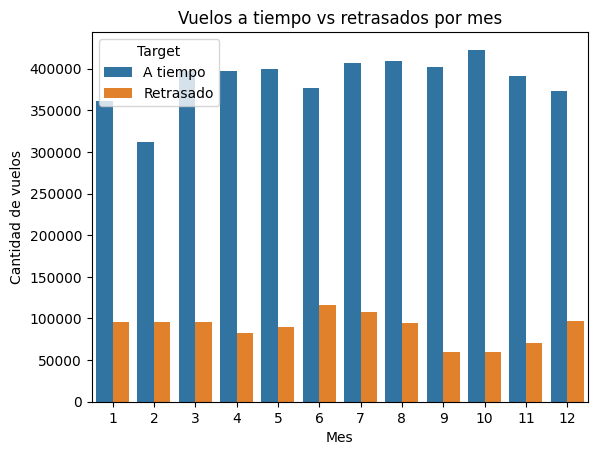

MONTH  DELAYED
1      0          361062
       1           95951
2      0          312484
       1           95179
3      0          396686
       1           95452
4      0          397004
       1           82247
5      0          399996
       1           89645
6      0          377105
       1          115742
7      0          406757
       1          107627
8      0          409843
       1           94113
9      0          402092
       1           60061
10     0          422799
       1           60079
11     0          391796
       1           70571
12     0          372945
       1           96772
dtype: int64

Porcentaje de vuelos retrasados por mes:
MONTH
1     20.995245
2     23.347471
3     19.395373
4     17.161571
5     18.308312
6     23.484367
7     20.923474
8     18.674845
9     12.995913
10    12.441859
11    15.262984
12    20.602192
Name: DELAYED, dtype: float64


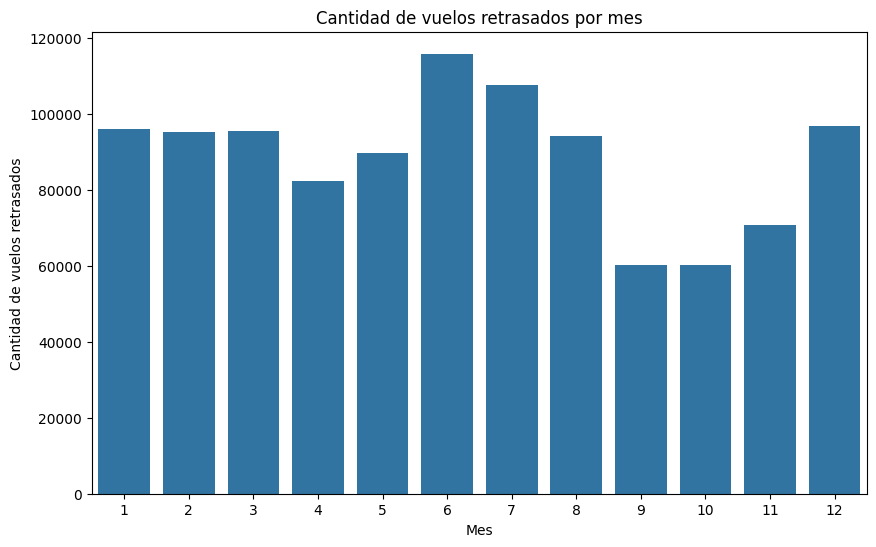


Cantidad de vuelos retrasados por mes:
MONTH
1      95951
2      95179
3      95452
4      82247
5      89645
6     115742
7     107627
8      94113
9      60061
10     60079
11     70571
12     96772
Name: count, dtype: int64


In [19]:
#Distribución por mes y retrasos
sns.countplot(data=df, x='MONTH', hue='DELAYED')
plt.title('Vuelos a tiempo vs retrasados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos')
plt.legend(title='Target', labels=['A tiempo', 'Retrasado'])
plt.show()

print(df.groupby(['MONTH', 'DELAYED']).size())

porcentaje_por_mes = df.groupby('MONTH')['DELAYED'].mean() * 100
print("\nPorcentaje de vuelos retrasados por mes:")
print(porcentaje_por_mes)

#Filtramos solo los vuelos que se retrasaron
df_retrasados = df[df['DELAYED'] == 1]

# Grafica
plt.figure(figsize=(10,6))
sns.countplot(x='MONTH', data=df_retrasados)
plt.title('Cantidad de vuelos retrasados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos retrasados')
plt.show()

retrasos_por_mes = df[df['DELAYED'] == 1]['MONTH'].value_counts().sort_index()
print("\nCantidad de vuelos retrasados por mes:")
print(retrasos_por_mes)

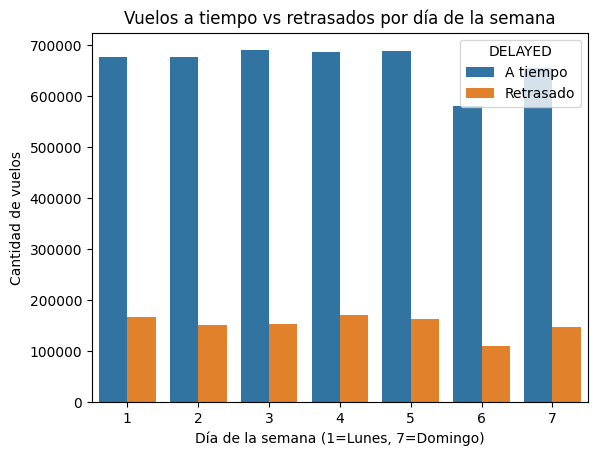

DAY_OF_WEEK  DELAYED
1            0          675528
             1          166266
2            0          676216
             1          151183
3            0          689638
             1          153604
4            0          686194
             1          171692
5            0          687946
             1          163441
6            0          579430
             1          110315
7            0          655617
             1          146938
dtype: int64

Porcentaje de vuelos retrasados por semana:
DAY_OF_WEEK
1    19.751388
2    18.272079
3    18.215886
4    20.013382
5    19.197028
6    15.993592
7    18.308776
Name: DELAYED, dtype: float64


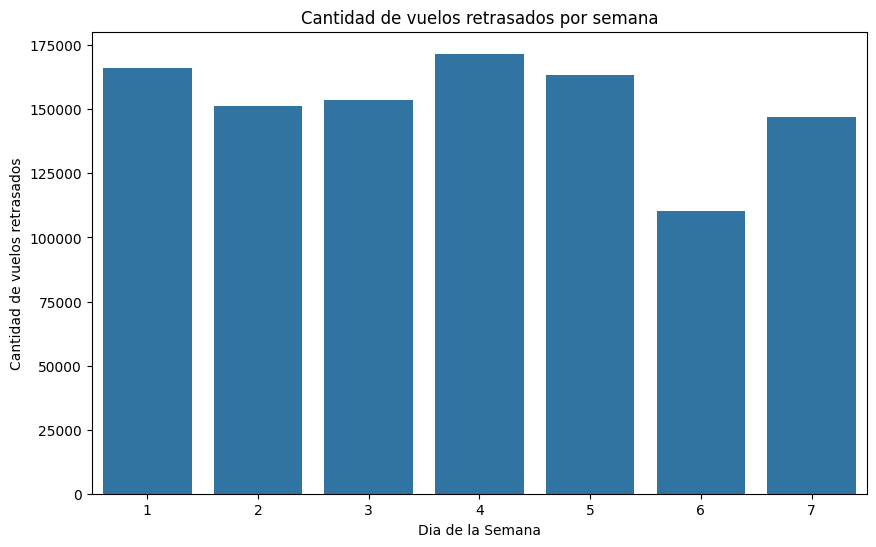


Cantidad de vuelos retrasados por semana:
DAY_OF_WEEK
1    166266
2    151183
3    153604
4    171692
5    163441
6    110315
7    146938
Name: count, dtype: int64


In [20]:
#Distribución de retrasos por día de la semana
sns.countplot(data=df, x='DAY_OF_WEEK', hue='DELAYED')
plt.title('Vuelos a tiempo vs retrasados por día de la semana')
plt.xlabel('Día de la semana (1=Lunes, 7=Domingo)')
plt.ylabel('Cantidad de vuelos')
plt.legend(title='DELAYED', labels=['A tiempo', 'Retrasado'])
plt.show()

print(df.groupby(['DAY_OF_WEEK', 'DELAYED']).size())

porcentaje_por_semana = df.groupby('DAY_OF_WEEK')['DELAYED'].mean() * 100
print("\nPorcentaje de vuelos retrasados por semana:")
print(porcentaje_por_semana)

#Filtramos solo los vuelos que se retrasaron
df_retrasados = df[df['DELAYED'] == 1]

# Grafica
plt.figure(figsize=(10,6))
sns.countplot(x='DAY_OF_WEEK', data=df_retrasados)
plt.title('Cantidad de vuelos retrasados por semana')
plt.xlabel('Dia de la Semana')
plt.ylabel('Cantidad de vuelos retrasados')
plt.show()

retrasos_por_semana = df[df['DELAYED'] == 1]['DAY_OF_WEEK'].value_counts().sort_index()
print("\nCantidad de vuelos retrasados por semana:")
print(retrasos_por_semana)

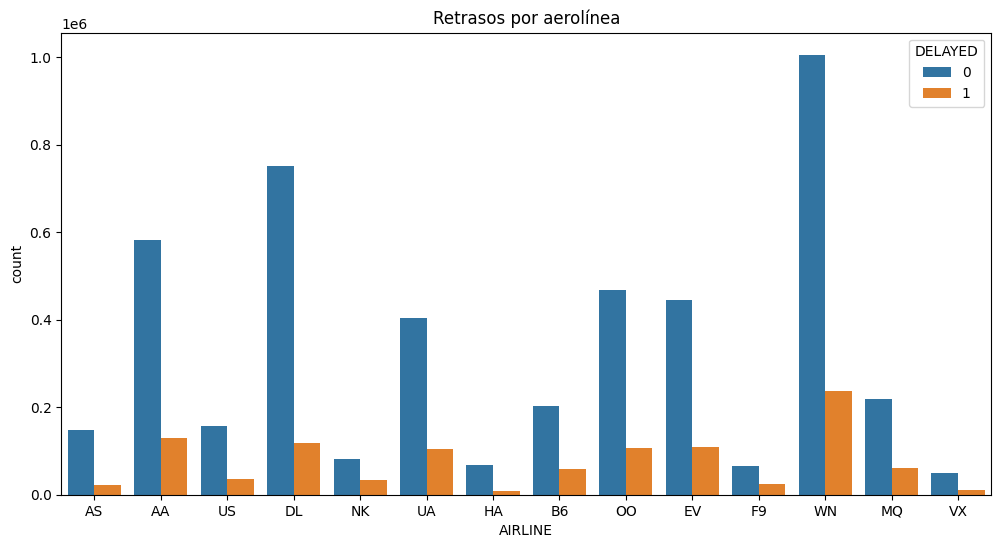

AIRLINE  DELAYED
AA       0           582656
         1           130279
AS       0           149087
         1            22352
B6       0           202867
         1            59175
DL       0           752252
         1           118023
EV       0           445568
         1           109184
F9       0            66520
         1            23570
HA       0            67423
         1             8618
MQ       0           218244
         1            60547
NK       0            80972
         1            34221
OO       0           469019
         1           107795
UA       0           403040
         1           104722
US       0           157674
         1            36549
VX       0            49470
         1            11778
WN       0          1005777
         1           236626
dtype: int64

Porcentaje de vuelos retrasados por Aerolinea:
AIRLINE
AA    18.273615
AS    13.037874
B6    22.582258
DL    13.561575
EV    19.681587
F9    26.162726
HA    11.333360
MQ    21.717703
NK

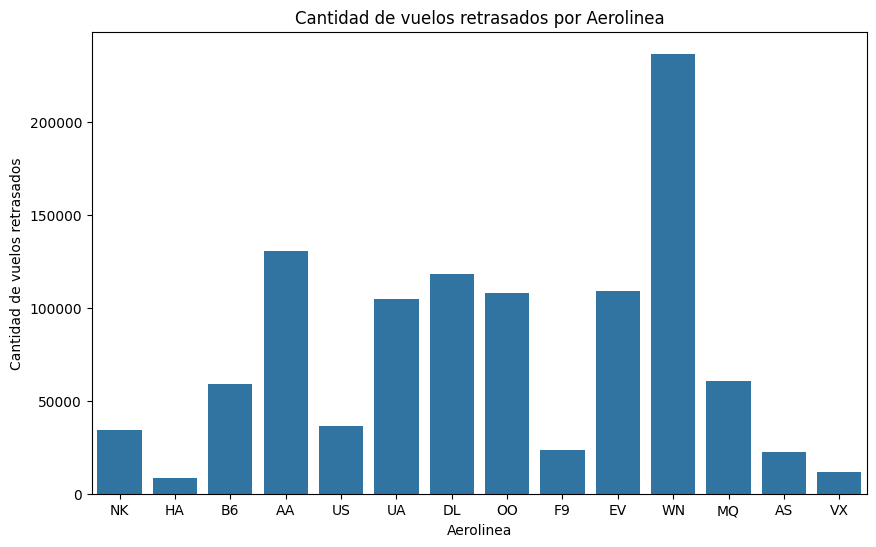


Cantidad de vuelos retrasados por Aerolinea:
AIRLINE
AA    130279
AS     22352
B6     59175
DL    118023
EV    109184
F9     23570
HA      8618
MQ     60547
NK     34221
OO    107795
UA    104722
US     36549
VX     11778
WN    236626
Name: count, dtype: int64


In [21]:
#Retrasos según aerolínea
plt.figure(figsize=(12,6))
sns.countplot(x='AIRLINE', hue='DELAYED', data=df)
plt.title('Retrasos por aerolínea')
plt.show()

print(df.groupby(['AIRLINE', 'DELAYED']).size())

porcentaje_por_aero = df.groupby('AIRLINE')['DELAYED'].mean() * 100
print("\nPorcentaje de vuelos retrasados por Aerolinea:")
print(porcentaje_por_aero)

#Filtramos solo los vuelos que se retrasaron
df_retrasados = df[df['DELAYED'] == 1]

# Graficar
plt.figure(figsize=(10,6))
sns.countplot(x='AIRLINE', data=df_retrasados)
plt.title('Cantidad de vuelos retrasados por Aerolinea')
plt.xlabel('Aerolinea')
plt.ylabel('Cantidad de vuelos retrasados')
plt.show()

retrasos_por_aero = df[df['DELAYED'] == 1]['AIRLINE'].value_counts().sort_index()
print("\nCantidad de vuelos retrasados por Aerolinea:")
print(retrasos_por_aero)

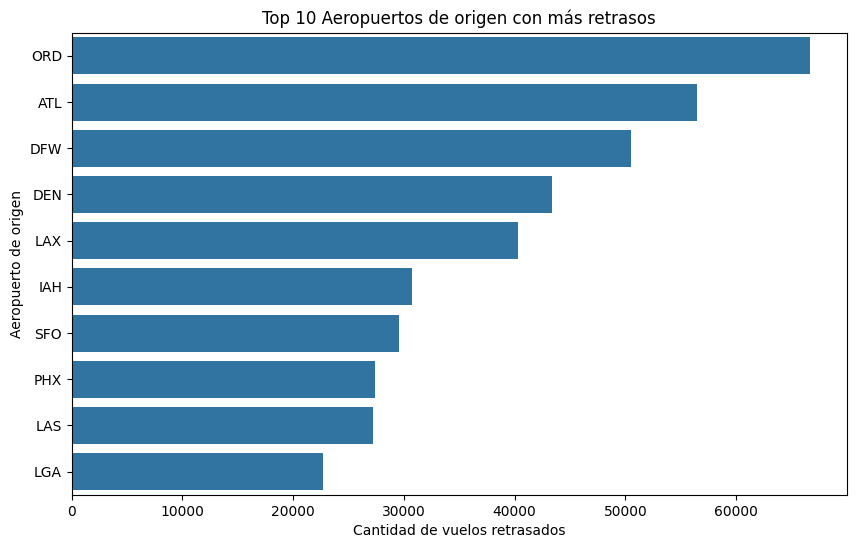

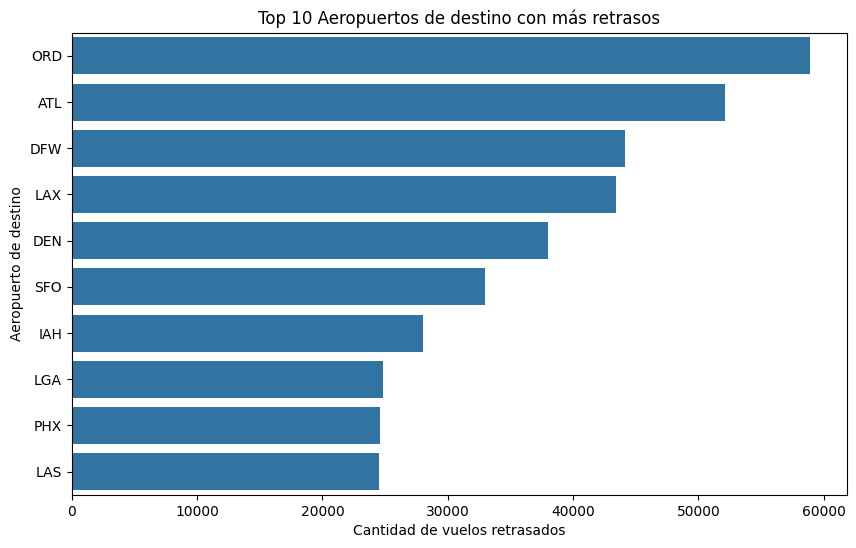

In [22]:
# Top 10 aeropuertos con más vuelos retrasados (origen)
top_origen = df[df['DELAYED'] == 1]['ORIGIN_AIRPORT'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_origen.values, y=top_origen.index)
plt.title('Top 10 Aeropuertos de origen con más retrasos')
plt.xlabel('Cantidad de vuelos retrasados')
plt.ylabel('Aeropuerto de origen')
plt.show()

# Idem para aeropuerto de destino
top_destino = df[df['DELAYED'] == 1]['DESTINATION_AIRPORT'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_destino.values, y=top_destino.index)
plt.title('Top 10 Aeropuertos de destino con más retrasos')
plt.xlabel('Cantidad de vuelos retrasados')
plt.ylabel('Aeropuerto de destino')
plt.show()

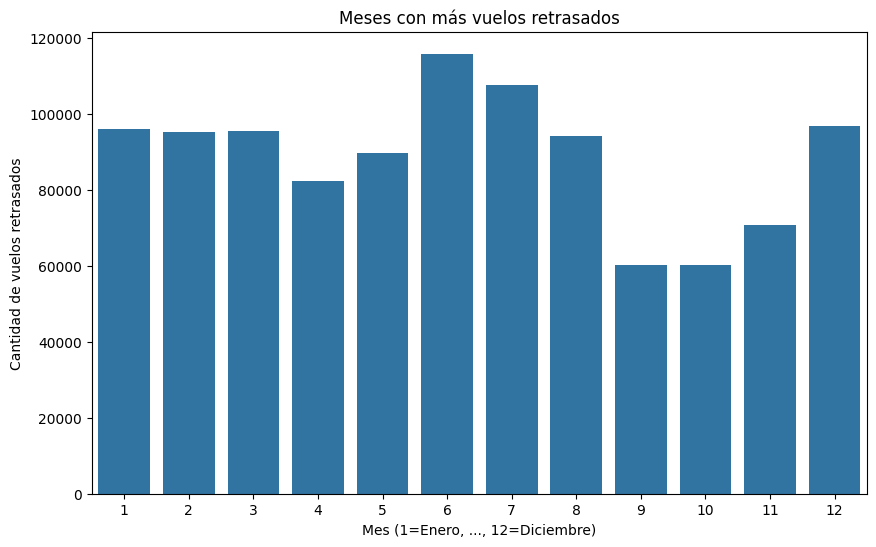


Cantidad de vuelos retrasados por mes:
MONTH
6     115742
7     107627
12     96772
1      95951
3      95452
2      95179
8      94113
5      89645
4      82247
11     70571
10     60079
9      60061
Name: count, dtype: int64


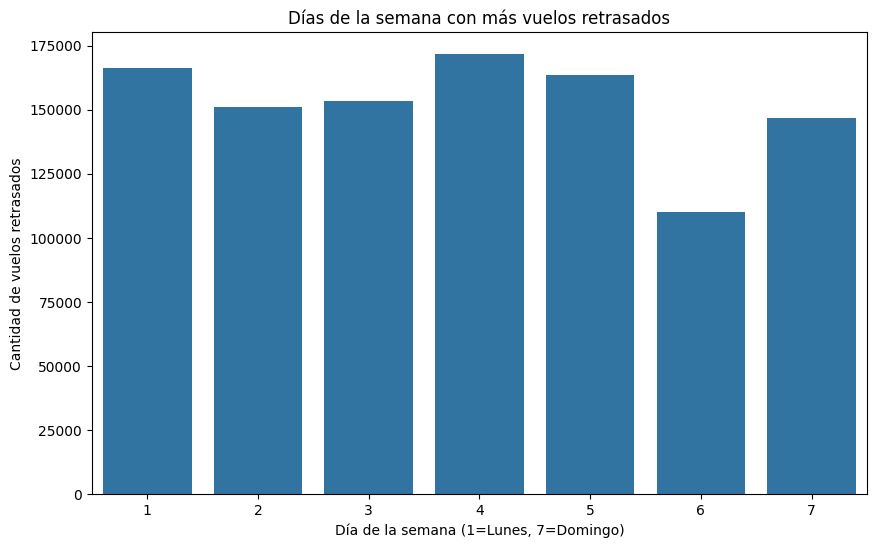


Cantidad de vuelos retrasados por día de la semana:
DAY_OF_WEEK
4    171692
1    166266
5    163441
3    153604
2    151183
7    146938
6    110315
Name: count, dtype: int64


In [23]:
#Top meses y Días con más vuelos retrasados

# Top meses con más retrasos (ordenado de mayor a menor)
top_meses = df[df['DELAYED'] == 1]['MONTH'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=top_meses.index, y=top_meses.values)
plt.title('Meses con más vuelos retrasados')
plt.xlabel('Mes (1=Enero, ..., 12=Diciembre)')
plt.ylabel('Cantidad de vuelos retrasados')
plt.show()

print("\nCantidad de vuelos retrasados por mes:")
print(top_meses)

# Top días de la semana con más retrasos (ordenado de mayor a menor)
top_dias = df[df['DELAYED'] == 1]['DAY_OF_WEEK'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=top_dias.index, y=top_dias.values)
plt.title('Días de la semana con más vuelos retrasados')
plt.xlabel('Día de la semana (1=Lunes, 7=Domingo)')
plt.ylabel('Cantidad de vuelos retrasados')
plt.show()

print("\nCantidad de vuelos retrasados por día de la semana:")
print(top_dias)

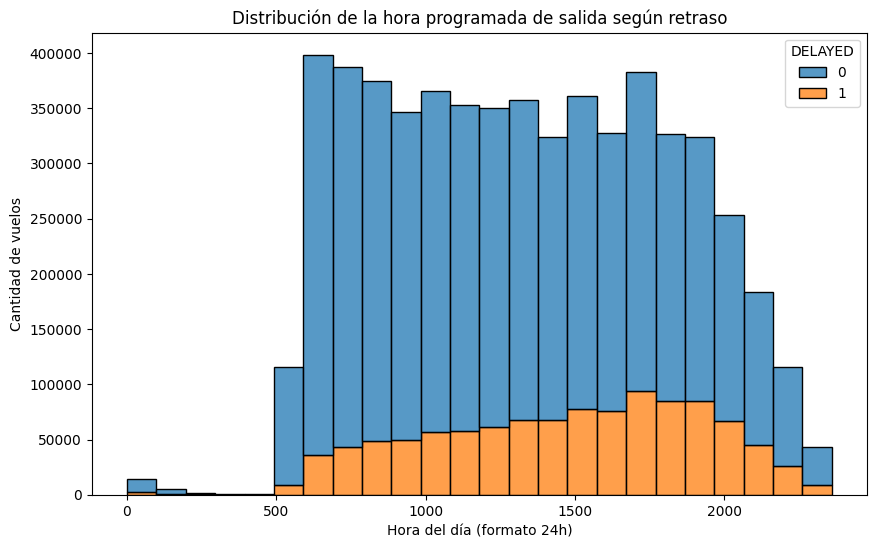

In [24]:
#Distribución del horario de salida programada
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='SCHEDULED_DEPARTURE', bins=24, kde=False, hue='DELAYED', multiple='stack')
plt.title('Distribución de la hora programada de salida según retraso')
plt.xlabel('Hora del día (formato 24h)')
plt.ylabel('Cantidad de vuelos')
plt.show()

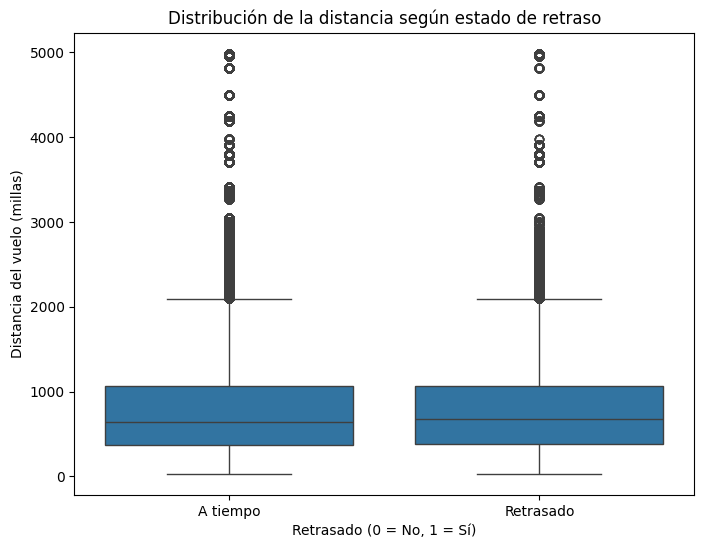

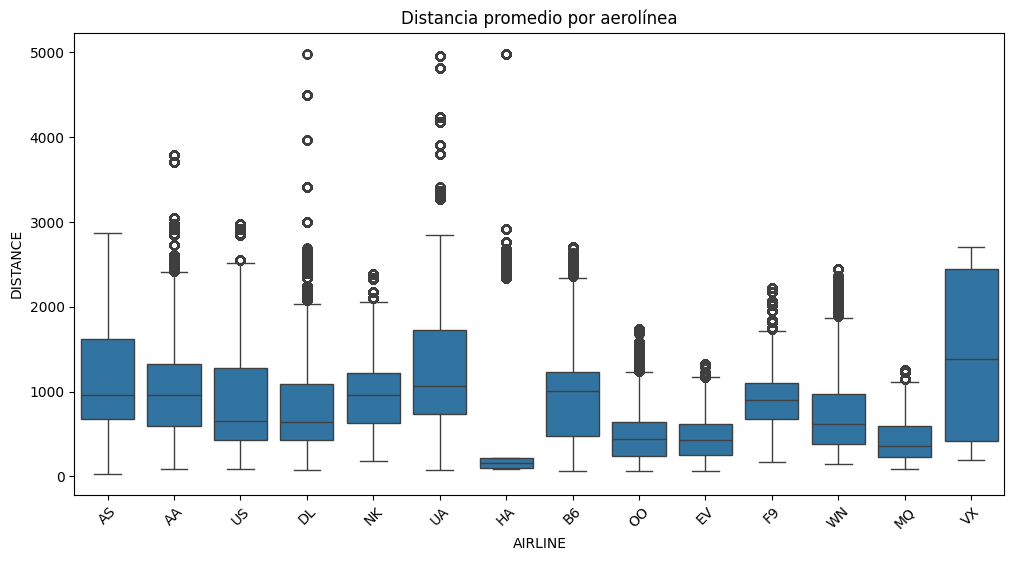

In [25]:
#Estadísticas de distancia

plt.figure(figsize=(8,6))
sns.boxplot(x='DELAYED', y='DISTANCE', data=df)
plt.title('Distribución de la distancia según estado de retraso')
plt.xlabel('Retrasado (0 = No, 1 = Sí)')
plt.ylabel('Distancia del vuelo (millas)')
plt.xticks([0, 1], ['A tiempo', 'Retrasado'])
plt.show()

#Duración promedio de los vuelos (DISTANCE) por aerolínea

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='AIRLINE', y='DISTANCE')
plt.title('Distancia promedio por aerolínea')
plt.xticks(rotation=45)
plt.show()

Matriz de correlación entre variables numéricas:
                        MONTH       DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
MONTH                1.000000  0.005315    -0.009427      -0.019988   
DAY                  0.005315  1.000000     0.002099       0.002916   
DAY_OF_WEEK         -0.009427  0.002099     1.000000       0.015153   
FLIGHT_NUMBER       -0.019988  0.002916     0.015153       1.000000   
SCHEDULED_DEPARTURE -0.000214 -0.001793     0.007737      -0.006971   
SCHEDULED_TIME       0.010337  0.002888     0.014611      -0.316079   
DISTANCE             0.010612  0.002977     0.015931      -0.329824   
SCHEDULED_ARRIVAL   -0.010361 -0.003878     0.006874      -0.015119   
ARRIVAL_DELAY       -0.036793 -0.003097    -0.017027       0.018419   
DELAYED             -0.044164 -0.007648    -0.013190       0.007579   

                     SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  \
MONTH                          -0.000214        0.010337  0.010612   
DAY                          

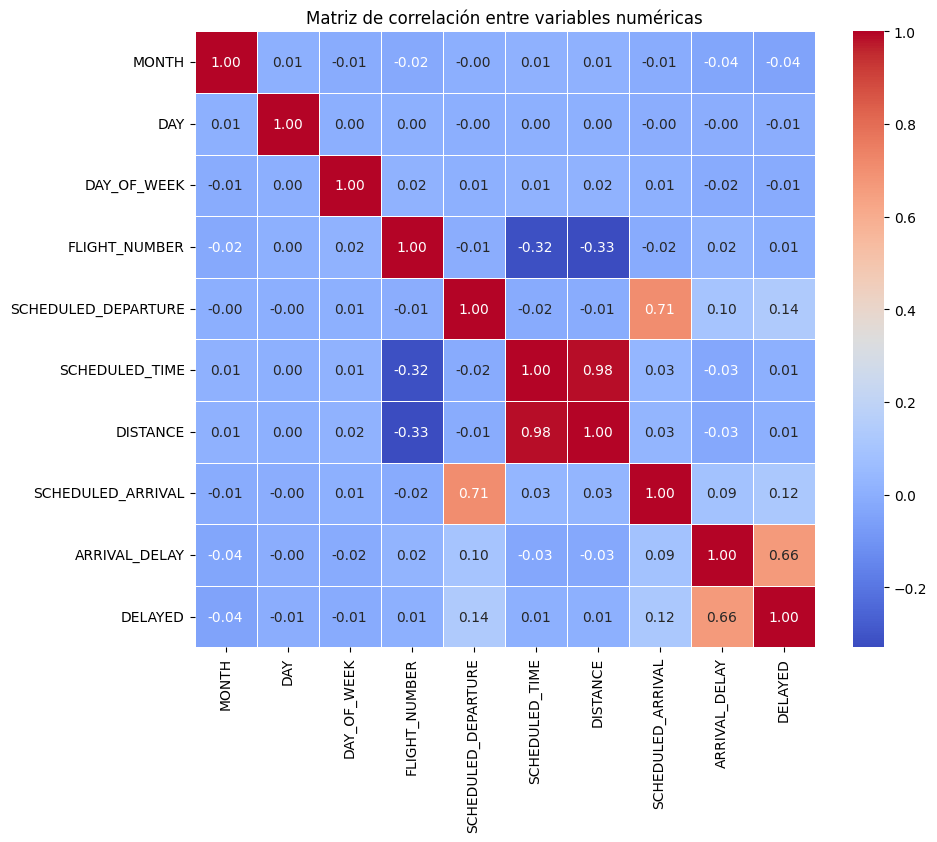

In [26]:
#Mapa de calor de correlación entre variables numéricas del df_limpio

num_cols = df.select_dtypes(include='number')

# Calcular la matriz de correlación
corr_matrix = num_cols.corr()

print("Matriz de correlación entre variables numéricas:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

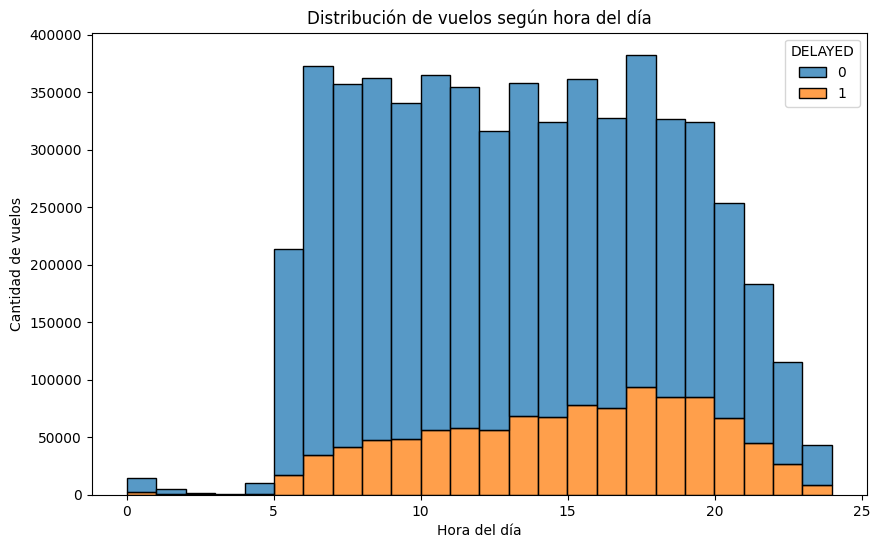

In [27]:
#Retrasos a lo largo del día (conversión de SCHEDULED_DEPARTURE)

df['DEP_HOUR'] = df['SCHEDULED_DEPARTURE'] // 100 + (df['SCHEDULED_DEPARTURE'] % 100)/60
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='DEP_HOUR', bins=24, hue='DELAYED', multiple='stack')
plt.title('Distribución de vuelos según hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de vuelos')
plt.show()

In [28]:
#Cruce entre aerolínea y aeropuerto

top_combos = df[df['DELAYED'] == 1].groupby(['AIRLINE', 'ORIGIN_AIRPORT']).size().sort_values(ascending=False).head(10)
print(top_combos)

AIRLINE  ORIGIN_AIRPORT
DL       ATL               29977
AA       DFW               26887
WN       MDW               16505
UA       ORD               15706
WN       LAS               15198
         BWI               14995
UA       IAH               12971
MQ       ORD               12942
         DFW               11898
WN       DEN               11832
dtype: int64


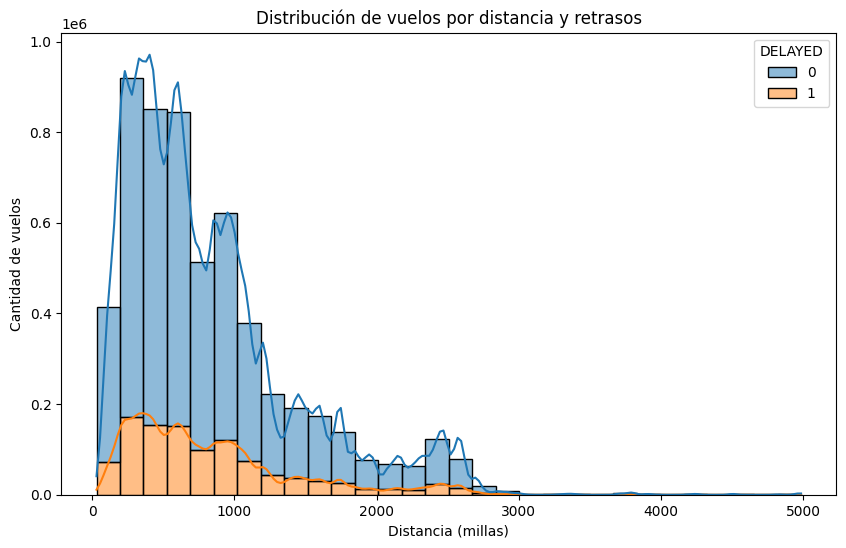

In [29]:
#Distribución de vuelos por distancia

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='DISTANCE', bins=30, hue='DELAYED', kde=True, multiple='stack')
plt.title('Distribución de vuelos por distancia y retrasos')
plt.xlabel('Distancia (millas)')
plt.ylabel('Cantidad de vuelos')
plt.show()

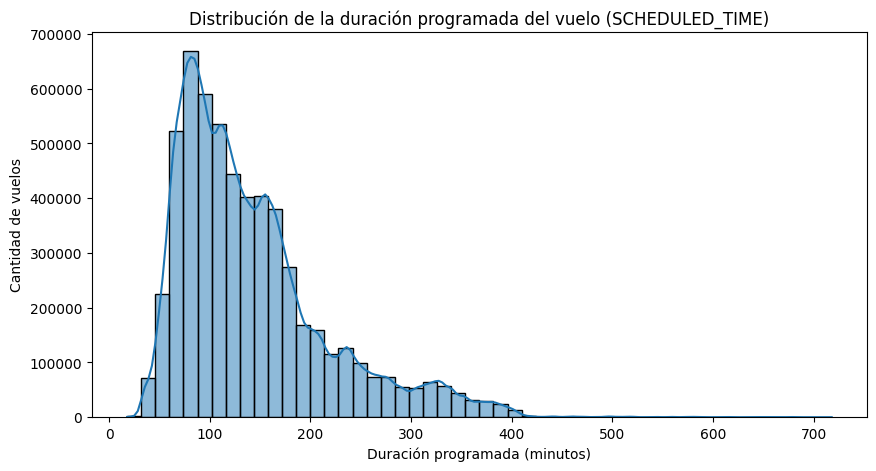

In [30]:
#Distribución de SCHEDULED_TIME

plt.figure(figsize=(10,5))
sns.histplot(df['SCHEDULED_TIME'], bins=50, kde=True)
plt.title('Distribución de la duración programada del vuelo (SCHEDULED_TIME)')
plt.xlabel('Duración programada (minutos)')
plt.ylabel('Cantidad de vuelos')
plt.show()

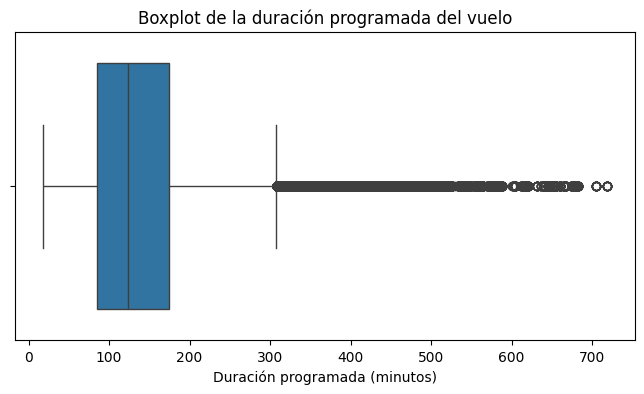

In [31]:
#Boxplot para detectar outliers en SCHEDULED_TIME

plt.figure(figsize=(8,4))
sns.boxplot(x=df['SCHEDULED_TIME'])
plt.title('Boxplot de la duración programada del vuelo')
plt.xlabel('Duración programada (minutos)')
plt.show()

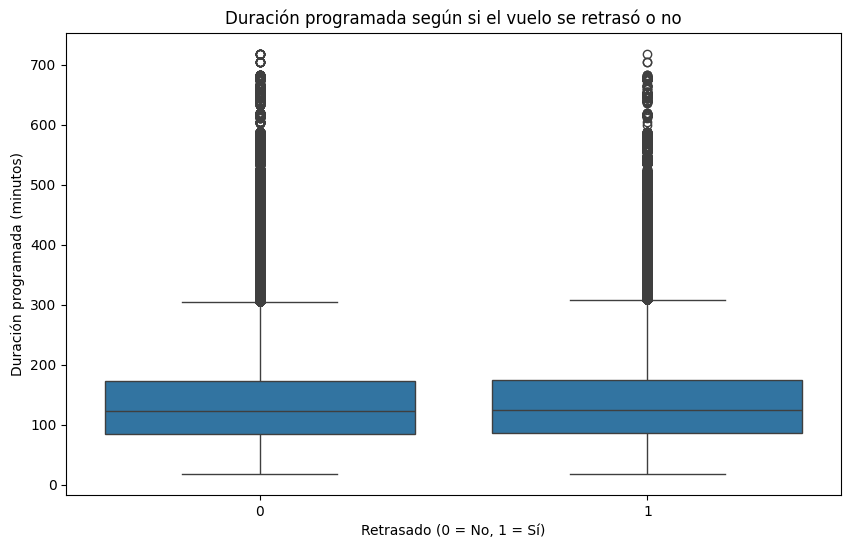

In [32]:
#Relación entre SCHEDULED_TIME y retrasos (DELAYED)

plt.figure(figsize=(10,6))
sns.boxplot(x='DELAYED', y='SCHEDULED_TIME', data=df)
plt.title('Duración programada según si el vuelo se retrasó o no')
plt.xlabel('Retrasado (0 = No, 1 = Sí)')
plt.ylabel('Duración programada (minutos)')
plt.show()

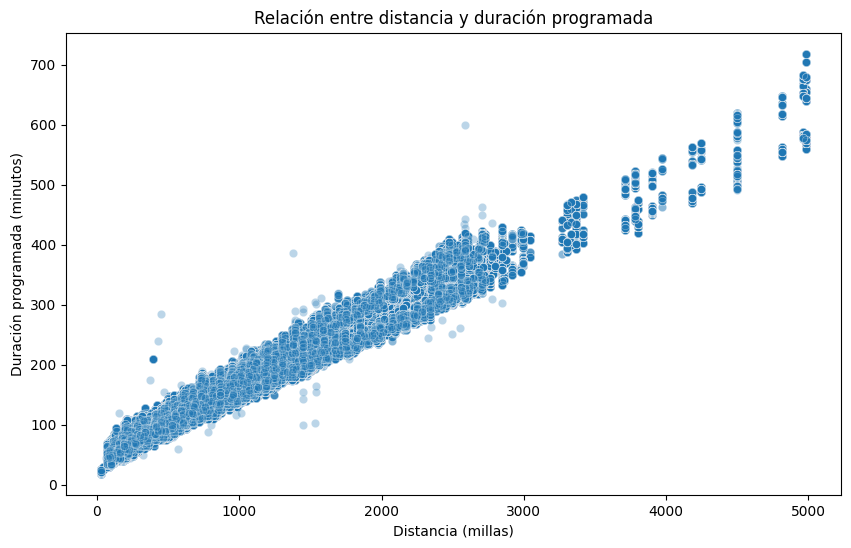

In [33]:
#Scatter plot: Duración programada vs Distancia

plt.figure(figsize=(10,6))
sns.scatterplot(x='DISTANCE', y='SCHEDULED_TIME', data=df, alpha=0.3)
plt.title('Relación entre distancia y duración programada')
plt.xlabel('Distancia (millas)')
plt.ylabel('Duración programada (minutos)')
plt.show()